# Cyber Data Analytics, CS4035
## Lab assignment 1: Fraud detection
### April 2019

**Group 20**:
- Konstantinos Chronas, 4923162
- Ioannis Lelekas, 4742559

## Data importing and preprocessing:
- importing data from csv to dataframe
- drop records corresponding to "Refused" transactions
- drop records correspodning NaNs
- conversion of categorical data to numeric

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./data_for_student_case.csv', sep = ',')

# Drop records corresponding to "Refused" transactions
data = data[data['simple_journal'] != 'Refused']

# Assess amount of NaN values
orig_shape = data.shape
nas = data.isna()
nas_id = np.sum(nas, 1)

print("Amount of nan values in Chargeback: ", np.sum(data['simple_journal'][nas_id > 0] == 'Chargeback'), "\n")
print("NaN values per feature:\n", np.sum(nas, 0), "\n")

# Drop records containing NaNs
data = data.dropna()
print("Number of NaN values omitted: ", orig_shape[0] - data.shape[0], "\n")

# Uncomment this line to see the type of features
# print(data.dtypes)

# Print counts of records corresponding to "Chargeback" (fraud), "Settled" (non-fraud) transactions,
# along with the repsective ratios. This is a perfect demonstration of the imbalance of the dataset.
labels = data['simple_journal']
print("Number of non-fraud: ", np.sum(labels == 'Settled'), ", with ratio: ", np.sum(labels == 'Settled')/len(labels))
print("Number of fraud: ", np.sum(labels == 'Chargeback'), ", with ratio: ", np.sum(labels == 'Chargeback')/len(labels))

data.groupby(by = 'simple_journal').count()

Amount of nan values in Chargeback:  0 

NaN values per feature:
 txid                                0
bookingdate                         0
issuercountrycode                   4
txvariantcode                       0
bin                                 0
amount                              0
currencycode                        0
shoppercountrycode                342
shopperinteraction                  0
simple_journal                      0
cardverificationcodesupplied    13194
cvcresponsecode                     0
creationdate                        0
accountcode                         0
mail_id                             0
ip_id                               0
card_id                             0
dtype: int64 

Number of NaN values omitted:  13526 

Number of non-fraud:  223165 , with ratio:  0.9984564449017941
Number of fraud:  345 , with ratio:  0.0015435550982058968


,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
simple_journal,,,,,,,,,,,,,,,,
Chargeback,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Settled,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165


### Convesion of categorical data to numeric
Each column of type "object" is converted, based on an enumeration of its unique values. We did not use one-hot encoding for the conversion, as this would lead to unnecessary creation of extra columns, thus to the increase of the dimensionality of feature space.

In [89]:
data_cat = data.copy(True)

# Storing the mapping used for the conversion, in case we want to revert back 
label_mapping = {}

# Convert currency code in order to 'amount' in a single code
label_mapping['numcurrencycode'] = {'SEK': 0.09703, 'MXN': 0.04358, 'AUD': 0.63161, 'NZD': 0.58377, 'GBP':1.13355} 
data['numcurrencycode'] = data['currencycode']
data.replace({'numcurrencycode' : label_mapping['numcurrencycode']}, inplace=True)
data['amount'] = data['amount'] * data['numcurrencycode']

label_mapping['simple_journal'] = {'Settled': 0, 'Chargeback' : 1}
data.replace({'simple_journal' : label_mapping['simple_journal']}, inplace=True)

# Convert all the rest columns which are of type 'object'
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

# Uncomment this line, if you want to see the mapppings for the conversion
#label_mapping

## Visualization task

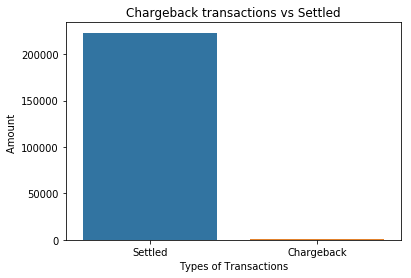

In [54]:
ax = data_cat['simple_journal'].value_counts()
plt.title('Chargeback transactions vs Settled')
sns.barplot(x=ax.index, y= ax)  
plt.xlabel('Types of Transactions')
plt.ylabel('Amount ')
plt.show()

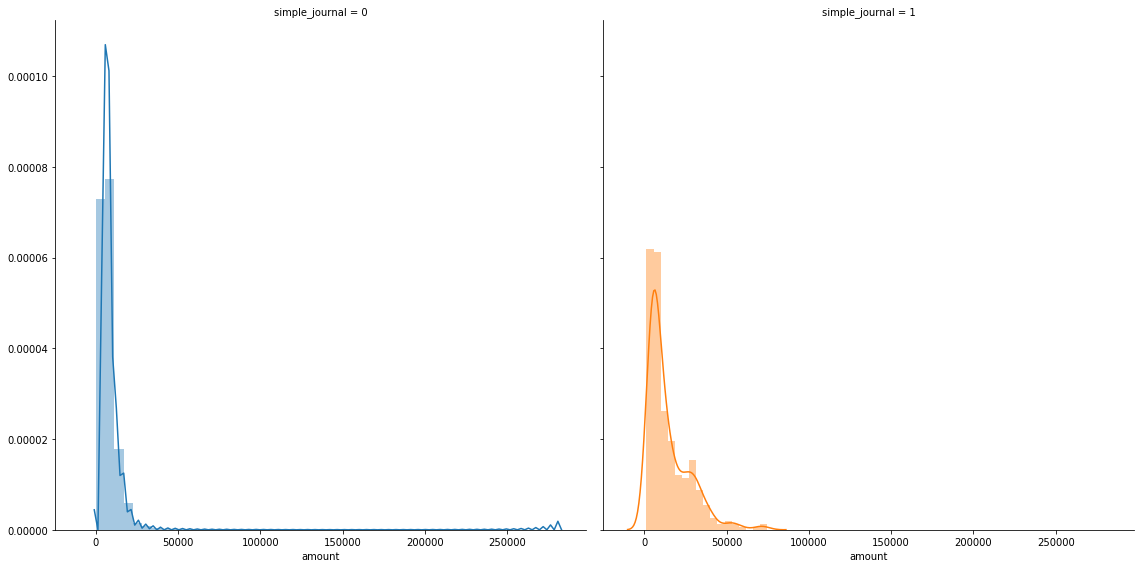

In [60]:
g = sns.FacetGrid(data, col="simple_journal", height=8,hue='simple_journal')
g.map(sns.distplot,"amount",kde=True)
# g.set_titles('Settled vs Chargeback')

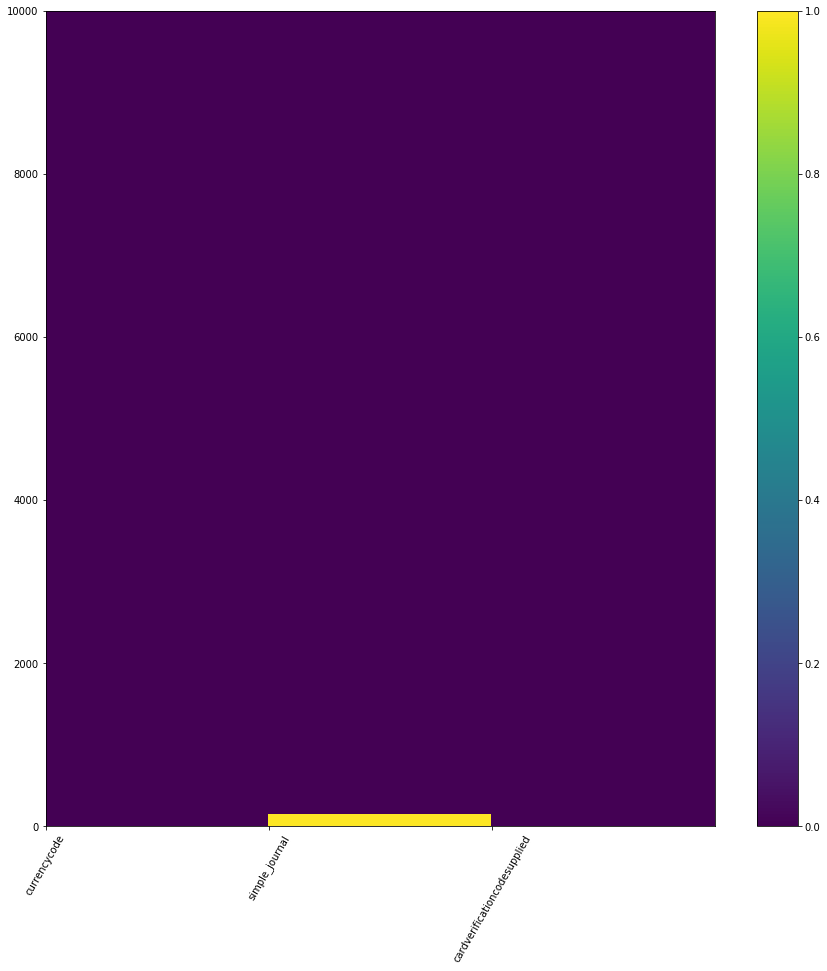

In [69]:
labels = ['currencycode', 'simple_journal', 'cardverificationcodesupplied']

plt.figure(figsize = (15,15))
plt.pcolor(data[labels][:10000])
plt.xticks(np.arange(len(labels)), labels, rotation = 60)
plt.colorbar()

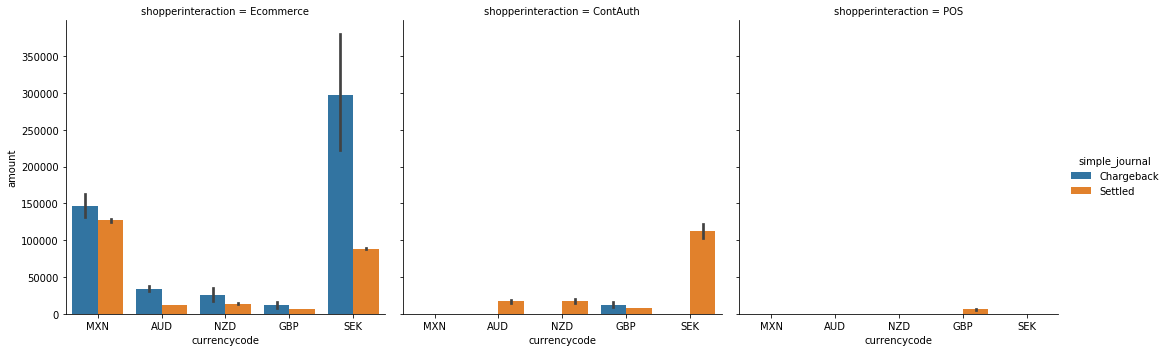

In [56]:
sns.catplot(data=data_cat,x="currencycode", y="amount", hue="simple_journal",kind='bar',col='shopperinteraction')

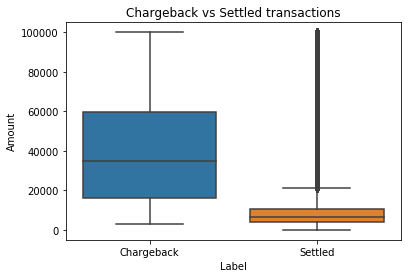

In [61]:
plt.title('Chargeback vs Settled transactions')
sns.boxplot(x="simple_journal", y="amount", data=data_cat[data_cat['amount']<= 100000])  
plt.xlabel('Label')
plt.ylabel('Amount')
plt.show()

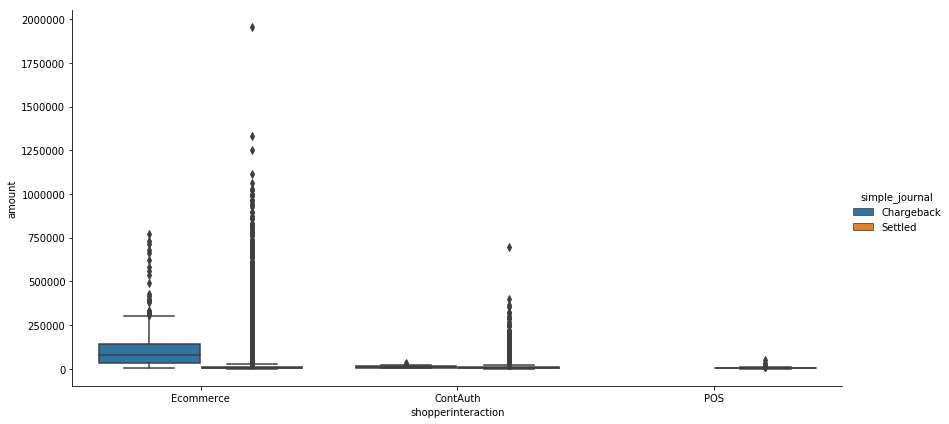

In [62]:
sns.catplot(data= data_cat,x="shopperinteraction", y="amount", hue="simple_journal",kind='box',height=6, aspect=2)

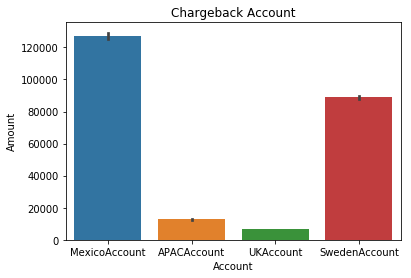

In [63]:
settled =data_cat.loc[data_cat['simple_journal']!='Chargeback']
plt.title('Chargeback Account')
sns.barplot(x="accountcode", y="amount", data=settled)  
plt.xlabel('Account')
plt.ylabel('Amount')
plt.show()

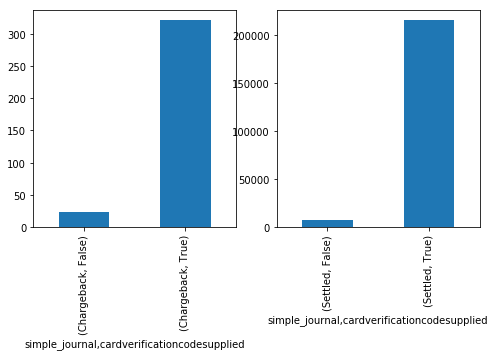

In [86]:
chargeback = data_cat[data_cat['simple_journal']=='Chargeback']
settled = data_cat[data_cat['simple_journal']!='Chargeback']

fig, axes = plt.subplots(figsize=(8,4) ,nrows=1, ncols=2)
# axes[0].set_xlabel("cardverificationcodesupplied")
# plt.title('Chargeback vs Settled cvc responce') 

new_df= chargeback[['simple_journal','cardverificationcodesupplied','txid']].groupby(['simple_journal','cardverificationcodesupplied']).count().plot(ax=axes[0],kind='bar', legend = False)


new_df2= settled[['simple_journal','cardverificationcodesupplied','txid']].groupby(['simple_journal','cardverificationcodesupplied']).count().plot(ax=axes[1], kind='bar', legend = False)



### Aggregated values per card id

Text(0, 0.5, 'Mean amount')

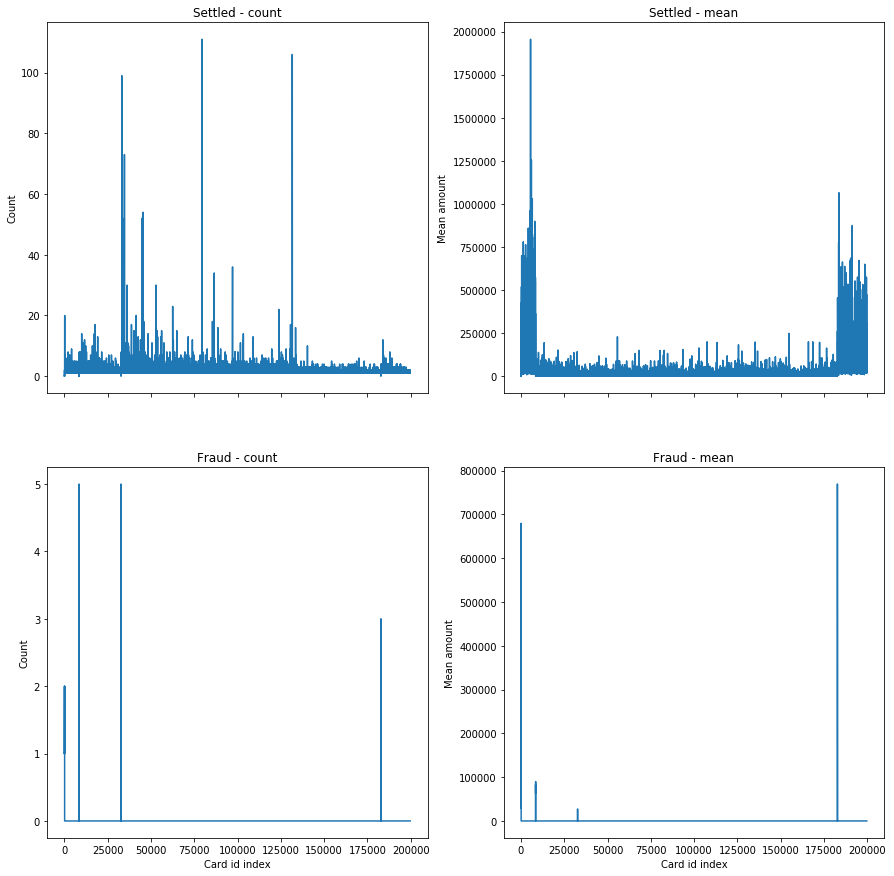

In [111]:
data_agg = data_cat[['card_id', 'simple_journal', 'amount']]

dd = pd.get_dummies(data_agg, columns = ['simple_journal'])

dd['sum_fraud'] = dd['amount'] * dd['simple_journal_Chargeback']
dd['sum_OK'] = dd['amount'] * dd['simple_journal_Settled']

dd_user = dd.groupby(by = 'card_id', sort = False).agg({
    'simple_journal_Settled' : sum,
    'sum_OK' : 'mean',
    'simple_journal_Chargeback' : sum,
    'sum_fraud' : 'mean'
})

f, ax = plt.subplots(2, 2, figsize = (15,15), sharex = True)

ax[0,0].plot(dd_user.values[:, 0])
ax[0,0].set_title("Settled - count")
ax[0,0].set_ylabel("Count")
ax[0,1].plot(dd_user.values[:, 1])
ax[0,1].set_title("Settled - mean")
ax[0,1].set_ylabel("Mean amount")
ax[1,0].plot(dd_user.values[:, 2])
ax[1,0].set_title("Fraud - count")
ax[1,0].set_xlabel("Card id index")
ax[1,0].set_ylabel("Count")
ax[1,1].plot(dd_user.values[:, 3])
ax[1,1].set_title("Fraud - mean")
ax[1,1].set_xlabel("Card id index")
ax[1,1].set_ylabel("Mean amount")

## Classification
### Imbalance task:
ROC analysis for various classifiers, with oue without use of SMOTE for dealing with the imabalance. We did test on more than the three required classifiers. The considered classifiers are:
- Naive Bayes,
- Logistic Regression,
- Linear Discriminant Analysis,
- Quadratic Discriminant Analysis
- Random Forest,
- Adaboost


### Classification task:
For the classification task, we we will further consider the classifiers
- Logistic Regression (LR) [White Box]
- Random Forest [Black Box]

In [29]:
from PlotConfusionMatrix import *
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from HelperFunctions import *
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# Construct dataset and corresponding labels
X = data.drop(['simple_journal', 'creationdate', 'bookingdate', 'currencycode', 'numcurrencycode'], axis = 1).values
y = data['simple_journal'].values
print("Dataset shape: ", X.shape)


# # Imputing missing values.. we did eventually adopted the easier way of just dropping records corresponding to
# NaNs, as it led to nearly identical performance
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# print(np.sum(np.isnan(X)))
# X = imp.fit_transform(X)

# imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
# X = imp.fit_transform(X)

# Outut the number of samples corresponding to each class
# Non-Fraud: 0 (Negative label)
# Fraud: 1 (Postive label)
print("Fraud class samples: ", np.sum(y == 1))
print("Non-fraud class samples: ", np.sum(y == 0))
print("Ratio: ", np.sum(y == 1)/np.sum(y == 0))

# 10-Fold stratified cross validation with shuffling of the dataset before extracting the stratified splits,
# used for estimating performance
num_splits = 10
cv = StratifiedKFold(n_splits = num_splits, shuffle = True)

Dataset shape:  (223510, 13)
Fraud class samples:  345
Non-fraud class samples:  223165
Ratio:  0.0015459413438487217


#### Naive Bayes for UNSMOTEd data


In [33]:
print(mean_auc, std_auc, mean_F1, std_F1)

0.9017231134878194 0.04184233826049576 0.036011933334085186 0.0054577420860717684


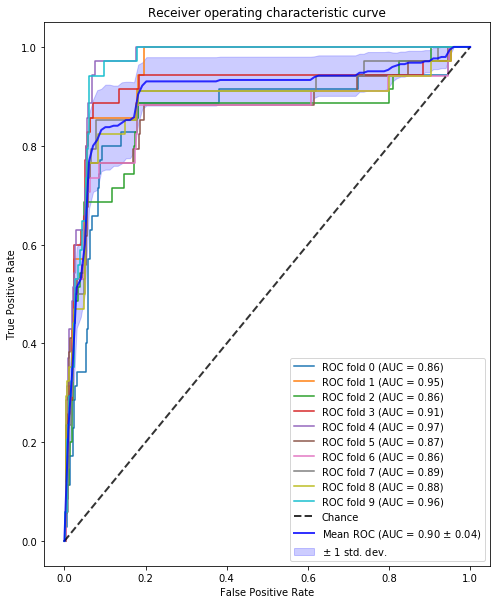

Confusion matrix, without normalization
[[211592  11573]
 [   127    218]]


<Figure size 432x288 with 0 Axes>

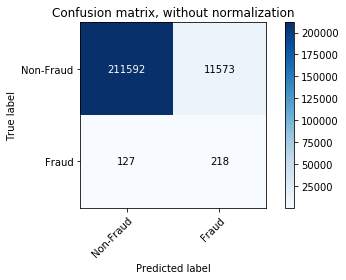

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
mean_tpr, std_tpr, mean_auc, std_auc, mean_F1, std_F1, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

#### SMOTE
- first determine the best over-sampling ratio and the number of nearest neighbours used for the extraction of the random samples, which leads to best performance in terms of F1-score
- evaluation is conducted in terms of 10-fold Stratified cross-validation

In [37]:
# Use cross-validation to determine the best overasmpling ratio
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X, y, clf, cv, 
                                                                                False, False, False, False, sm)
        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
# print("std AUC:\n", std_auc_cv)
print("Mean F1:\n", m_F1_cv)
# print("std F1:\n", std_F1_cv)

Mean AUC:
 [[0.90135218 0.90128172 0.89125202]
 [0.90078177 0.90117477 0.88879467]
 [0.90228588 0.90126475 0.88888889]
 [0.90215432 0.90233257 0.88895595]
 [0.90126899 0.90280197 0.8886266 ]
 [0.90281555 0.90295476 0.890146  ]
 [0.90307699 0.9028529  0.89005602]]
Mean F1:
 [[0.03566201 0.03486488 0.02362257]
 [0.01866266 0.01858564 0.01538052]
 [0.01584582 0.01586927 0.01495191]
 [0.01491073 0.01495603 0.01488623]
 [0.01494935 0.01489976 0.01546223]
 [0.015228   0.01512444 0.01552185]
 [0.01530045 0.01533373 0.0154659 ]]


#### Naive Bayes for SMOTEd data
Perform SMOTE with the ratio and number of neighbours yielding the highest mean F1-score

In [41]:
print(mean_auc_sm, std_auc_sm, mean_F1_sm, std_F1_sm)

0.9017426364485188 0.04171078201265337 0.01845010000252038 0.0018876282253651746


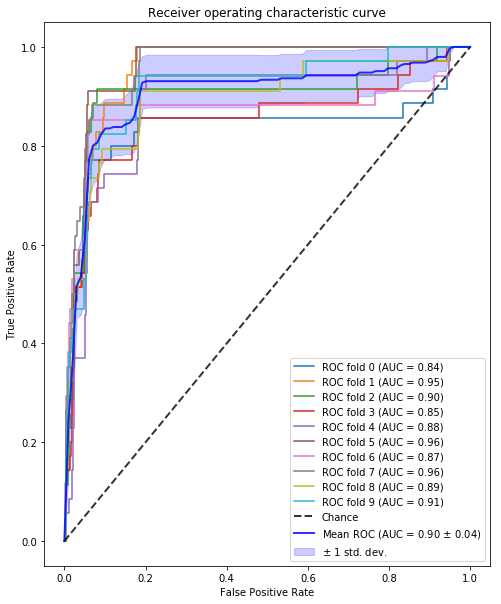

Confusion matrix, without normalization
[[192340  30825]
 [    56    289]]


<Figure size 432x288 with 0 Axes>

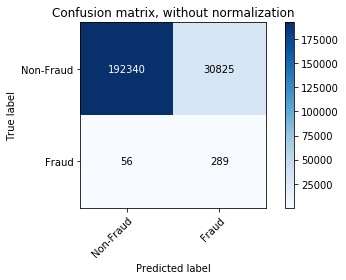

In [40]:
sm = SMOTE(sampling_strategy=0.05, k_neighbors=5)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, mean_F1_sm, std_F1_sm, cm_sm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

#### Combined plot with ROC curves corresponding to SMOTEd and UNSMOTEd case

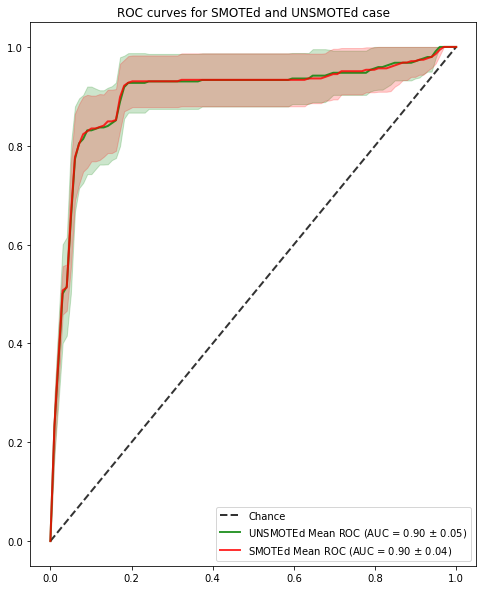

In [19]:
plt.figure(figsize = (8, 10))
plt.title("ROC curves for SMOTEd and UNSMOTEd case")
mean_fpr = np.linspace(0,1,100)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
             label='Chance', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='g',
     label=r'UNSMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr - std_tpr, 0), np.minimum(mean_tpr + std_tpr, 1), color ='g', alpha=.2)

plt.plot(mean_fpr, mean_tpr_sm, color='r',
     label=r'SMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_sm, std_auc_sm),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr_sm - std_tpr_sm, 0), np.minimum(mean_tpr_sm + std_tpr_sm, 1), color ='r', alpha=.2)

plt.legend()

#### Logistic Regression for UNSMOTEd data

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ilele/.conda/envs/cda/lib/pyth

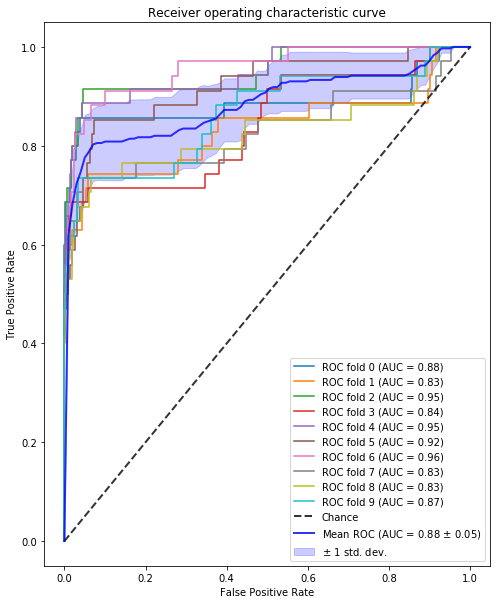

Confusion matrix, without normalization
[[223158      7]
 [   345      0]]


<Figure size 432x288 with 0 Axes>

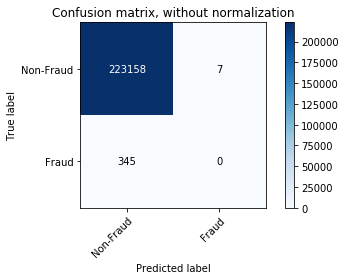

In [21]:
from  sklearn.linear_model import LogisticRegression as LR


clf = LR(C = 1, solver = 'lbfgs', multi_class = 'ovr', n_jobs=-1)
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

In [12]:
# Use cross-validation to determine the best overasmpling ratio and number of neighbours
# ratios = np.arange(0.1, 1, 0.1)
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X, y, clf, cv, 
                                                                                False, False, False, False, sm)

        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

Mean AUC:
 [[0.89578049 0.89552924 0.89394449]
 [0.91180969 0.91477464 0.90530855]
 [0.92056192 0.92278754 0.92025465]
 [0.92413377 0.92358713 0.92621764]
 [0.92834479 0.92688397 0.92834309]
 [0.92860199 0.92921654 0.92950004]
 [0.9286665  0.92904592 0.92927426]]
Mean F1:
 [[0.03851948 0.0222401  0.15146498]
 [0.1583554  0.16651191 0.28621961]
 [0.17836179 0.17131224 0.20064368]
 [0.08108329 0.0790764  0.08070543]
 [0.02067678 0.02103754 0.02238426]
 [0.01610707 0.01641601 0.01723585]
 [0.01521799 0.01549114 0.01618074]]


#### Logistic Regression for SMOTEd data

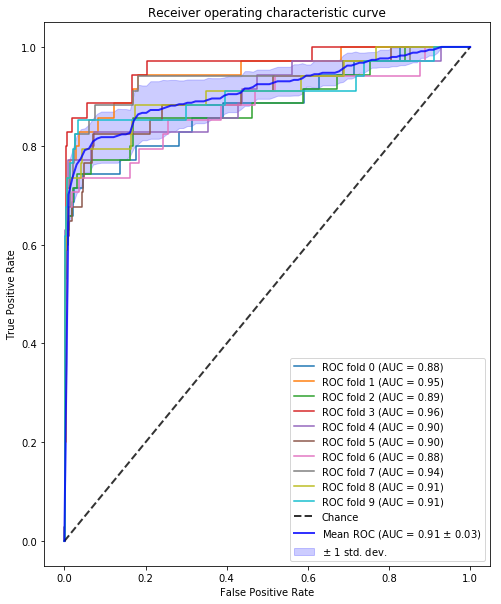

Confusion matrix, without normalization
[[222541    624]
 [   175    170]]


<Figure size 432x288 with 0 Axes>

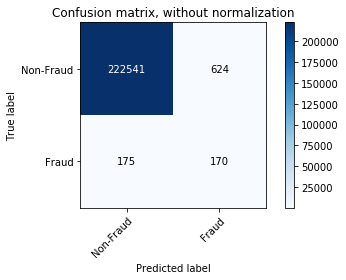

In [23]:
sm = SMOTE(sampling_strategy=0.05, k_neighbors=100)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, _, _, cm_sm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

#### Combined plot with ROC curves corresponding to SMOTEd and UNSMOTEd case

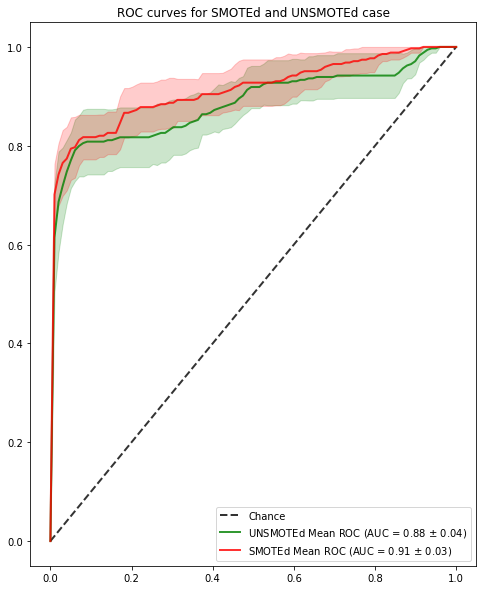

In [14]:
plt.figure(figsize = (8, 10))
plt.title("ROC curves for SMOTEd and UNSMOTEd case")
mean_fpr = np.linspace(0,1,100)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
             label='Chance', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='g',
     label=r'UNSMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr - std_tpr, 0), np.minimum(mean_tpr + std_tpr, 1), color ='g', alpha=.2)

plt.plot(mean_fpr, mean_tpr_sm, color='r',
     label=r'SMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_sm, std_auc_sm),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr_sm - std_tpr_sm, 0), np.minimum(mean_tpr_sm + std_tpr_sm, 1), color ='r', alpha=.2)

plt.legend()

#### Preprocessing for tuning the Logistic Regression classifier
- First scale the data, so all features have zero mean and unit variance,
- determine the best value for penalty parameter C based again on 10-fold cross-validation and the best F1-score

Here we tested both tuning the classifier  before applying SMOTE on scaled data, as well as tuning after applying SMOTE on the scaled data. The former case did not actually let us to perform any tuning since the classifier consistently detected approximately zero TP (hence 0 F1-score) so we did drop this case. Therefore, we do tune the classifier on SMOTEd and scaled dataset, which again though leads to pretty similar performance.

Additionally, we tested using other methods than 'lbgfs', but they led to extremely long running times and since we had already met the performance requirements we decided to settle on 'lbfgs'.

In [21]:
# Scale the data so they have 0 mean and unit variance
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [22]:
# Use cross-validation to determine the best overasmpling ratio and number of neighbours
# ratios = np.arange(0.1, 1, 0.1)
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X_scaled, y, clf, cv, 
                                                                                False, False, False, False, sm)

        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

Mean AUC:
 [[0.94871148 0.94862575 0.9467176 ]
 [0.95952211 0.95912996 0.95291147]
 [0.96262541 0.96317375 0.96059587]
 [0.96631271 0.9651634  0.9640056 ]
 [0.96733978 0.96799338 0.96767931]
 [0.96717426 0.96831933 0.96981071]
 [0.97160513 0.9725278  0.96933113]]
Mean F1:
 [[0.4248276  0.44654804 0.54945147]
 [0.30866733 0.31422736 0.34842426]
 [0.26079542 0.25941191 0.26270443]
 [0.1935881  0.19464375 0.18955685]
 [0.0993446  0.10565004 0.09955032]
 [0.06864216 0.07446663 0.07254005]
 [0.05920507 0.06394161 0.06364424]]


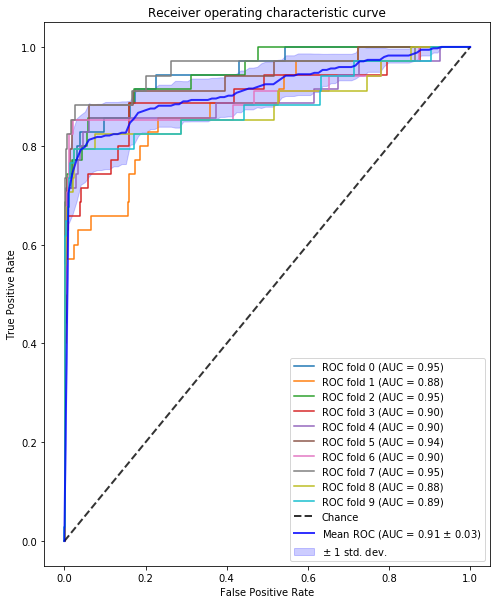

Confusion matrix, without normalization
[[236047    644]
 [   147    198]]


<Figure size 432x288 with 0 Axes>

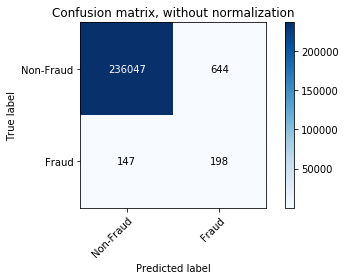

In [29]:
sm = SMOTE(sampling_strategy=0.05, k_neighbors=100)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, _, _, cm_sm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

In [30]:
# Use cross-validation to determine the best value for C parameter and the optimal solver used for LR classifier
# ratios = np.arange(0.1, 1, 0.1)
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
# solver = np.array(['newton-cg', 'lbfgs', 'sag', 'saga'])
solver = np.array(['lbfgs'])

sm = SMOTE(sampling_strategy=0.05, k_neighbors=100)

# Arrays for keeping mean values and standard deviations extracted by 10-fold crossval for each set of parameters
m_auc_cv = np.zeros((len(C), len(solver)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for c in C: 
    j = 0
    for s in solver:
        clf = LR(C = c, solver = s, multi_class='ovr', n_jobs=-1)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X_scaled, y, clf, cv, 
                                                                                False, False, False, False, sm)
        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to C values and columns to solvers
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

Mean AUC:
 [[0.92120788]
 [0.94990408]
 [0.95522027]
 [0.95319922]
 [0.95343349]
 [0.95393685]
 [0.95337323]]
Mean F1:
 [[0.0862239 ]
 [0.27910702]
 [0.33768774]
 [0.34888925]
 [0.34908632]
 [0.34949739]
 [0.35064322]]


#### Tuned Logistic Regression classifier for SMOTEd and scaled data

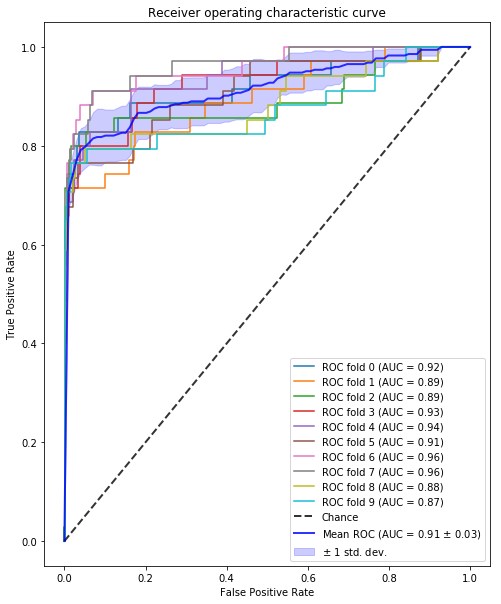

Confusion matrix, without normalization
[[236036    655]
 [   142    203]]


<Figure size 432x288 with 0 Axes>

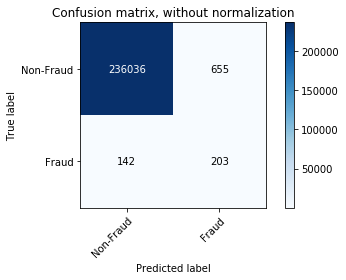

In [34]:
clf = LR(C = 1000, solver = 'lbfgs', multi_class = 'ovr', n_jobs=-1)
sm = SMOTE(sampling_strategy=0.05, k_neighbors=100)
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

#### Random Forest
This is our black box classifier. Apparently, it meets the requirements right away reaching almost flawless performance on the dataset. Hence, we did not proceed on applying SMOTE for this classifier. We did though proceed to some tuning, in essence testing performance for various number of estimators used by the ensemble classifier. As shown below, even 10 estimators suffice for nearly perfect performance!



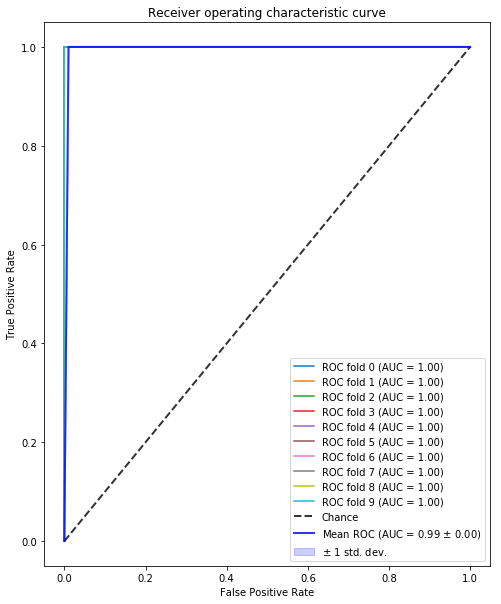

Confusion matrix, without normalization
[[223164      1]
 [     4    341]]


<Figure size 432x288 with 0 Axes>

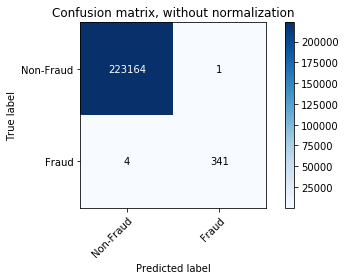

In [46]:
from  sklearn.ensemble import RandomForestClassifier as RF

clf = RF(n_estimators='warn', criterion='gini', min_samples_split=2, min_samples_leaf=1, 
         min_weight_fraction_leaf=0.0, max_features='auto', min_impurity_decrease=0.0, 
         bootstrap=True, n_jobs=-1, verbose=0, warm_start=False)
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

#### Classifier tuning:
Determine the optimal
- number of estimators and 
- criterion used for splitting

In [45]:
# Use cross-validation to determine the best overasmpling ratio
# ratios = np.arange(0.1, 1, 0.1)
n_estimators = np.array([10, 100, 1000])
criterion = solver = np.array(['gini', 'entropy'])

m_auc_cv = np.zeros((len(C), len(solver)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for n in n_estimators: 
    j = 0
    for c in criterion:
        clf = RF(n_estimators=n, criterion=c, n_jobs=-1)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X, y, clf, cv, 
                                                                                False, False, False, False, sm)
        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to C values and columns to solvers
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

NameError: name 'C' is not defined

#### Random Forest on UNSMOTE data

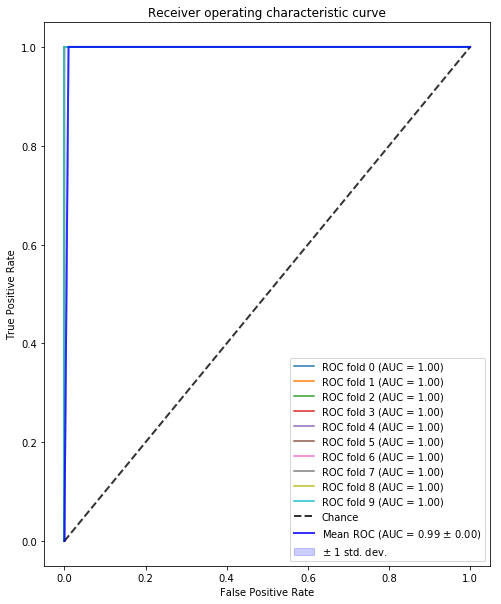

Confusion matrix, without normalization
[[223163      2]
 [     5    340]]


<Figure size 432x288 with 0 Axes>

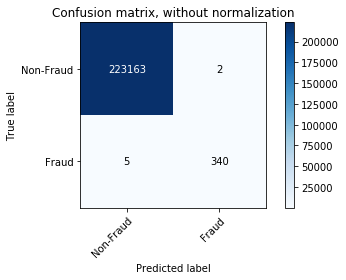

In [48]:
clf = RF(n_estimators=10, criterion='gini', n_jobs=-1)
mean_tpr, std_tpr, mean_auc, std_auc, mean_F1, std_F1, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

In [49]:
print(mean_auc, std_auc, mean_F1, std_F1)

0.994949494949495 1.644462588044991e-06 0.9896806944121522 0.011612771388665226


#### Linear Discriminant Analysis on UNSMOTEd data

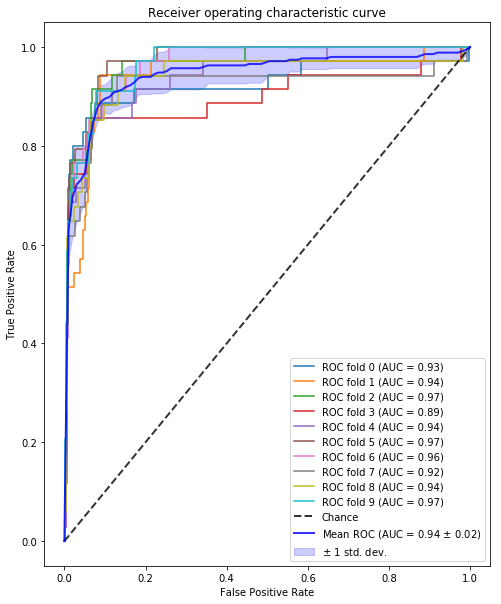

Confusion matrix, without normalization
[[222665    500]
 [   329     16]]


<Figure size 432x288 with 0 Axes>

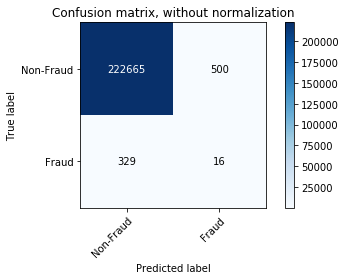

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA(solver='svd')
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

In [38]:
# Use cross-validation to determine the best overasmpling ratio
# ratios = np.arange(0.1, 1, 0.1)
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X, y, clf, cv, 
                                                                                False, False, False, False, sm)
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

Mean AUC:
 [[0.9434284  0.94188863 0.93630082]
 [0.94626517 0.94508616 0.94002716]
 [0.94906799 0.94839912 0.94226127]
 [0.95305492 0.95308038 0.94599694]
 [0.95870724 0.95850352 0.95282404]
 [0.96226976 0.96044563 0.95600883]
 [0.96280791 0.96198285 0.95690434]]
Mean F1:
 [[0.12164133 0.1285107  0.17234042]
 [0.1181315  0.11695283 0.07786762]
 [0.067885   0.06889144 0.05240417]
 [0.04358856 0.04352276 0.03833669]
 [0.01984887 0.02067002 0.02047439]
 [0.01593528 0.01639527 0.01684805]
 [0.0155808  0.01563047 0.01605038]]


#### Linear Discriminant Analysis on SMOTEd data

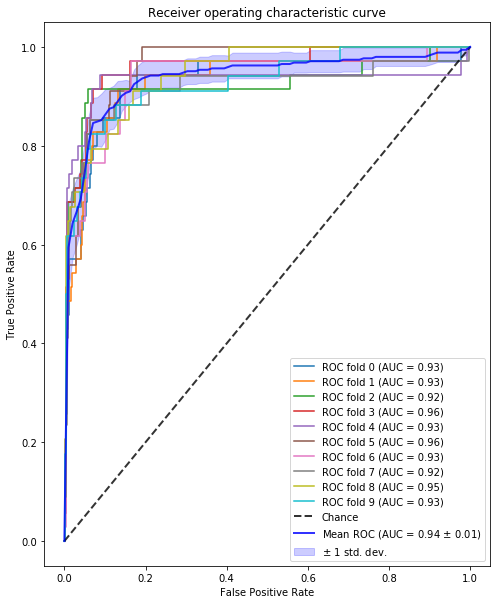

Confusion matrix, without normalization
[[235466   1225]
 [   204    141]]


<Figure size 432x288 with 0 Axes>

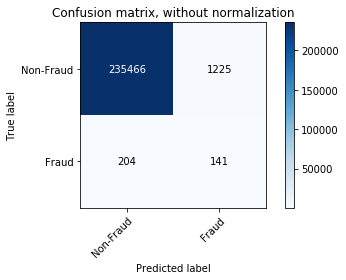

In [42]:
sm = SMOTE(sampling_strategy=0.01, k_neighbors=100)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, _, _, cm_sm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

#### Combined plot corresponding to SMOTEd and UNSMOTEd case

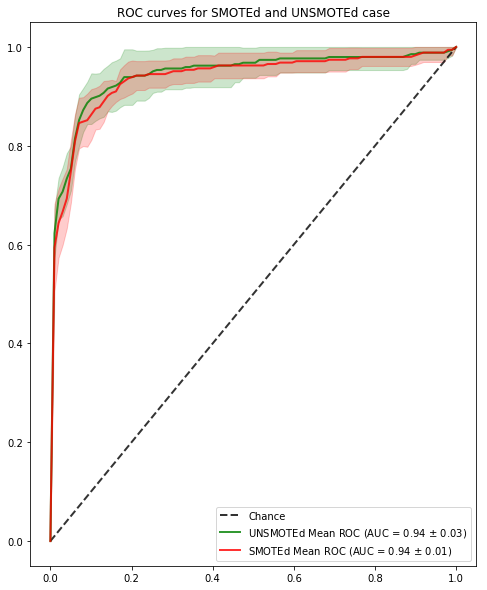

In [43]:
# Combined plot with ROC curves corresponding to the SMOTEd and UNSMOTEd case of the considered classifier
plt.figure(figsize = (8, 10))
plt.title("ROC curves for SMOTEd and UNSMOTEd case")
mean_fpr = np.linspace(0,1,100)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
             label='Chance', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='g',
     label=r'UNSMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr - std_tpr, 0), np.minimum(mean_tpr + std_tpr, 1), color ='g', alpha=.2)

plt.plot(mean_fpr, mean_tpr_sm, color='r',
     label=r'SMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_sm, std_auc_sm),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr_sm - std_tpr_sm, 0), np.minimum(mean_tpr_sm + std_tpr_sm, 1), color ='r', alpha=.2)

plt.legend()

#### Quadratic Discriminant Analysis on UNSMOTEd data

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

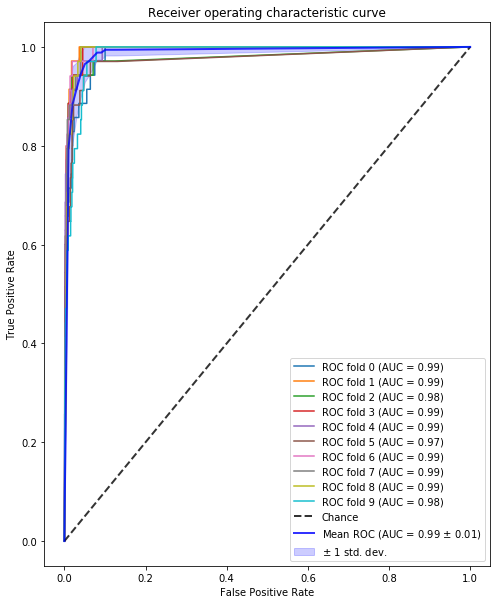

Confusion matrix, without normalization
[[219212   3953]
 [    57    288]]


<Figure size 432x288 with 0 Axes>

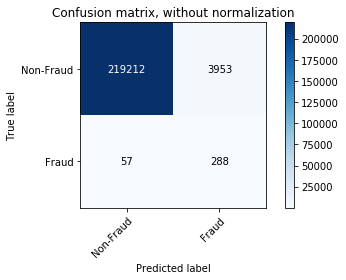

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

In [45]:
# Use cross-validation to determine the best overasmpling ratio
# ratios = np.arange(0.1, 1, 0.1)
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X, y, clf, cv, 
                                                                                False, False, False, False, sm)
#         print("Oversamping ratio: ", r, ", with mean AUC: ", np.round(m_auc, 5), " +- ", np.round(std_auc, 7),
#               " and mean F1: ", np.round(m_F1, 5), " +- ", np.round(std_F1, 7))
        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
print("Mean F1:\n", m_F1_cv)

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

Mean AUC:
 [[0.93820103 0.97950053 0.94894865]
 [0.95763312 0.95738747 0.96070588]
 [0.98232389 0.97608587 0.9850161 ]
 [0.92525382 0.94893389 0.97161095]
 [0.96751644 0.87196819 0.97119014]
 [0.96726116 0.92018709 0.97864506]
 [0.95862873 0.95865462 0.93934393]]
Mean F1:
 [[0.12308353 0.14908376 0.17116846]
 [0.14887022 0.14891365 0.16153669]
 [0.1460535  0.13417767 0.15218608]
 [0.12685503 0.13401759 0.15836581]
 [0.12857815 0.14439877 0.16356242]
 [0.13412677 0.17505991 0.14944716]
 [0.14504853 0.18437931 0.13929685]]


/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Quadratic Discriminant Analysis on SMOTEd data

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear

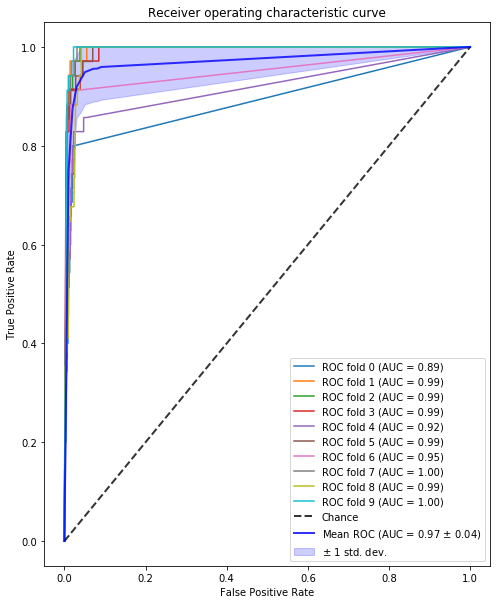

Confusion matrix, without normalization
[[233673   3018]
 [   103    242]]


<Figure size 432x288 with 0 Axes>

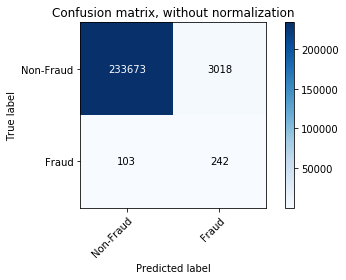

In [49]:
sm = SMOTE(sampling_strategy=0.01, k_neighbors=100)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, _, _, cm_sm = roc_analysis(X, y, clf, cv, True, True, True, False, sm)

#### Combined plot corresponding to SMOTEd and UNSMOTEd case

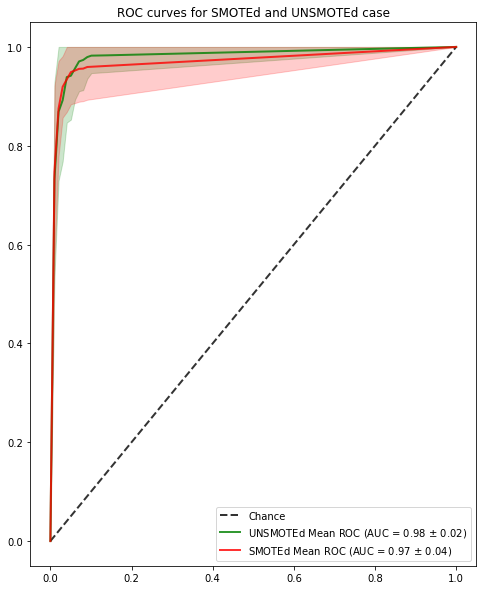

In [50]:
# Combined plot with ROC curves corresponding to the SMOTEd and UNSMOTEd case of the considered classifier
plt.figure(figsize = (8, 10))
plt.title("ROC curves for SMOTEd and UNSMOTEd case")
mean_fpr = np.linspace(0,1,100)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
             label='Chance', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='g',
     label=r'UNSMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr - std_tpr, 0), np.minimum(mean_tpr + std_tpr, 1), color ='g', alpha=.2)

plt.plot(mean_fpr, mean_tpr_sm, color='r',
     label=r'SMOTEd Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_sm, std_auc_sm),
     lw=2, alpha=.8)
plt.fill_between(mean_fpr, np.maximum(mean_tpr_sm - std_tpr_sm, 0), np.minimum(mean_tpr_sm + std_tpr_sm, 1), color ='r', alpha=.2)

plt.legend()

#### Adaboost on UNSMOTEd data

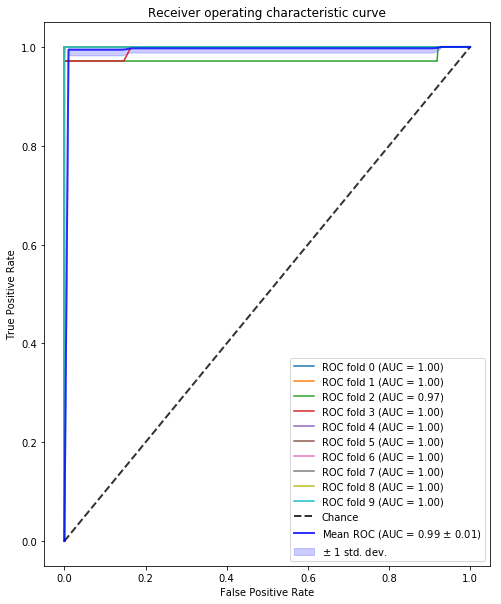

Confusion matrix, without normalization
[[236690      1]
 [     4    341]]


<Figure size 432x288 with 0 Axes>

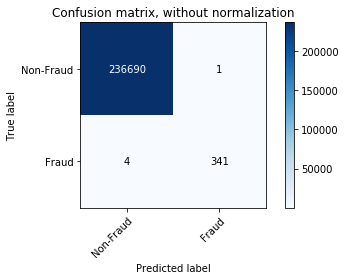

In [51]:
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

clf = AdaBoost(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R')
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X, y, clf, cv, True, True, True, False)

## Bonus Task

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as StandardScaler
from sklearn.ensemble import VotingClassifier

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

pca = PCA(n_components=0.95, whiten = True)
X_pca = pca.fit_transform(X_scaled)
pca.n_components_

7

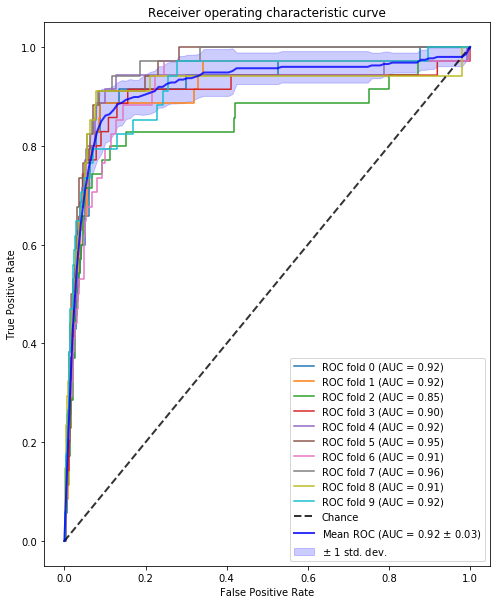

Confusion matrix, without normalization
[[232553   4138]
 [   215    130]]


<Figure size 432x288 with 0 Axes>

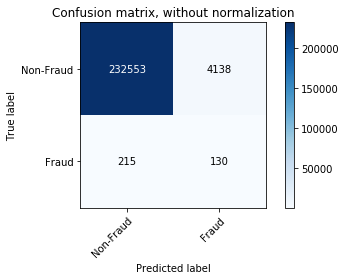

In [63]:
clf = LR(C = 1, solver = 'lbfgs', multi_class = 'auto')
sm = SMOTE(sampling_strategy=0.1, k_neighbors=5)

mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X_pca, y, clf, cv, True, True, True, False, sm)

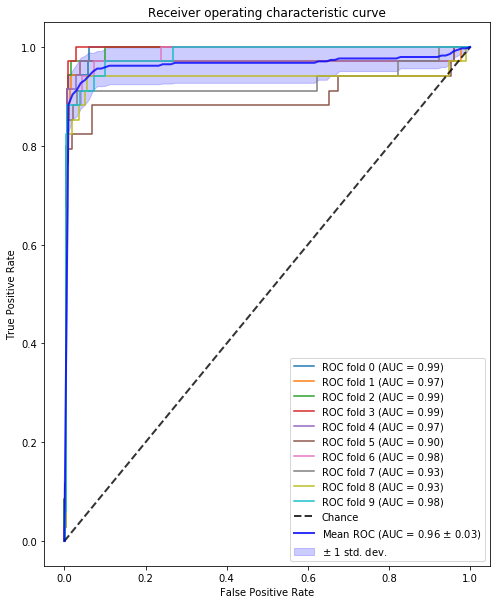

Confusion matrix, without normalization
[[235041   1650]
 [    53    292]]


<Figure size 432x288 with 0 Axes>

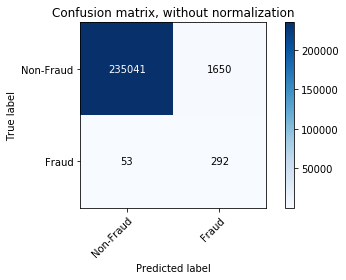

In [69]:
clf = LR(C = 1, solver = 'lbfgs', multi_class = 'auto')
sm = SMOTE(sampling_strategy=0.1, k_neighbors=5)

mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X_scaled, y, clf, cv, True, True, True, False, sm)

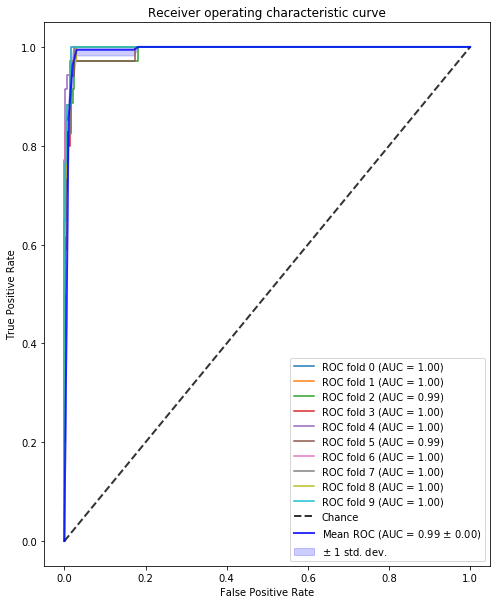

Confusion matrix, without normalization
[[236666     25]
 [   326     19]]


<Figure size 432x288 with 0 Axes>

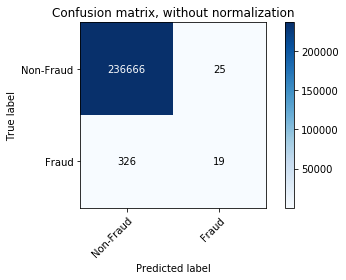

In [74]:
clf1 = LR(C = 1, solver = 'lbfgs', multi_class = 'auto')
clf2 = LDA(solver='svd')
clf3 = QDA()

clf = VotingClassifier(estimators=[('lr', clf1), ('lda', clf2), ('qda', clf3)], voting='soft', n_jobs = -1)
mean_tpr, std_tpr, mean_auc, std_auc, _, _, cm = roc_analysis(X_scaled, y, clf, cv, True, True, True, False)